In [1]:
import pandas as pd
# !pip install pycaret-ts-alpha

In [2]:
from pprint import pprint
from pycaret.internal.pycaret_experiment import TimeSeriesExperiment
from sktime.utils.plotting import plot_series

In [57]:
from pycaret.datasets import get_data
data = pd.read_pickle("/home/amir/github/LFD_projects_5/35-soyabean-time-series/DF_3_till_2013.pkl")
X_train = data['X_train']
y_train = data['y_train']
X_train.index = pd.to_datetime(pd.Series(X_train.index).dt.date)

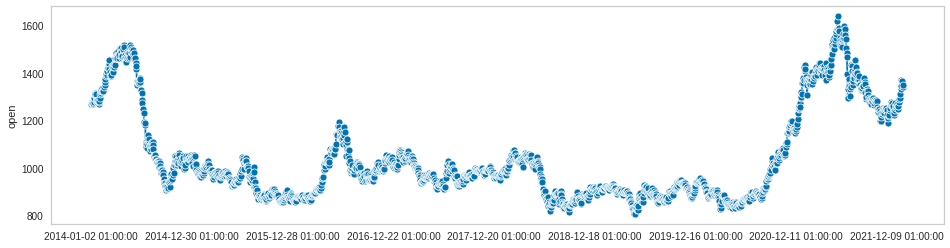

In [58]:
import matplotlib.pyplot as plt
_ = plot_series(y_train)
plt.grid()

In [59]:
exp = TimeSeriesExperiment()
# exp.setup(data=X_train,session_id=42, fh=1)
# exp.setup?
# X_train.index.freq = "1D"

>>> from pycaret.time_series import TSForecastingExperiment


In [85]:
# pd.Series(range(len(X_train)), index=pd.date_range("2000", freq="D", periods=3))
X_train = pd.Series(pd.date_range(X_train.index.min(), X_train.index.max(), freq='D')).rename("a").to_frame().merge(X_train, left_on='a', right_index=True, how="outer")
X_train = X_train.set_index("a")
X_train.index.freq = "D"

In [91]:
X_train = X_train.dropna(how='all', axis=0)

In [7]:
## Create a model manually
model = exp.create_model("ets")
model

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,1956-12,14.5614,18.7753,0.0366,0.0376,0.4986,0.5736,0.8853
1,1957-12,16.7994,19.3255,0.0458,0.0447,0.5495,0.5692,0.9022
2,1958-12,20.8906,23.4315,0.0495,0.0512,0.7311,0.7208,0.8772
Mean,NaT,17.4172,20.5108,0.0440,0.0445,0.5931,0.6212,0.8882
SD,NaT,2.6205,2.0774,0.0054,0.0055,0.0998,0.0705,0.0104


AutoETS(additive_only=False, allow_multiplicative_trend=False, auto=False,
        bounds=None, callback=None, damped_trend=False, dates=None, disp=False,
        error='add', freq=None, full_output=True, ignore_inf_ic=True,
        information_criterion='aic', initial_level=None, initial_seasonal=None,
        initial_trend=None, initialization_method='estimated', maxiter=1000,
        missing='none', n_jobs=None, restrict=True, return_params=False,
        seasonal='mul', sp=12, start_params=None, trend='add')

In [8]:
y_train = exp.get_config("y_train")
y_train[:5]

1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
Freq: M, Name: Number of airline passengers, dtype: float64

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,ETS,9.5284,15.4596,0.0203,0.0199,0.3129,0.4475,0.9569


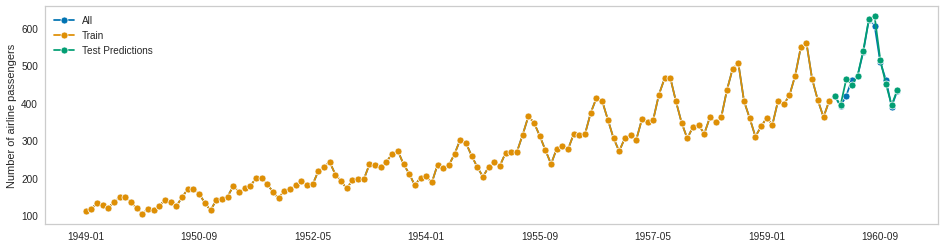

In [9]:
y_predict = exp.predict_model(model)
plot_series(data, y_train, y_predict, labels=['All', 'Train', 'Test Predictions'])
plt.grid()

In [10]:
tuned_model = exp.tune_model(model)
tuned_model

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,1956-12,7.9998,10.6890,0.0203,0.0204,0.2739,0.3265,0.9628
1,1957-12,21.6844,24.3479,0.0602,0.0580,0.7093,0.7172,0.8447
2,1958-12,28.0794,31.5320,0.0630,0.0655,0.9827,0.9700,0.7776
Mean,NaT,19.2545,22.1896,0.0478,0.0479,0.6553,0.6713,0.8617
SD,NaT,8.3756,8.6449,0.0195,0.0197,0.2918,0.2647,0.0766


AutoETS(additive_only=False, allow_multiplicative_trend=False, auto=False,
        bounds=None, callback=None, damped_trend=False, dates=None, disp=False,
        error='add', freq=None, full_output=True, ignore_inf_ic=True,
        information_criterion='aic', initial_level=None, initial_seasonal=None,
        initial_trend=None, initialization_method='estimated', maxiter=1000,
        missing='none', n_jobs=None, restrict=True, return_params=False,
        seasonal='mul', sp=12, start_params=None, trend='add')

In [11]:
exp.predict_model(tuned_model)

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,ETS,9.5284,15.4596,0.0203,0.0199,0.3129,0.4475,0.9569


1960-01    417.2259
1960-02    394.0010
1960-03    462.2039
1960-04    448.3354
1960-05    471.6350
1960-06    539.3334
1960-07    623.5586
1960-08    630.7453
1960-09    515.1992
1960-10    449.7400
1960-11    394.1069
1960-12    433.6765
Freq: M, Name: Number of airline passengers, dtype: float64

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,ETS,9.5284,15.4596,0.0203,0.0199,0.3129,0.4475,0.9569


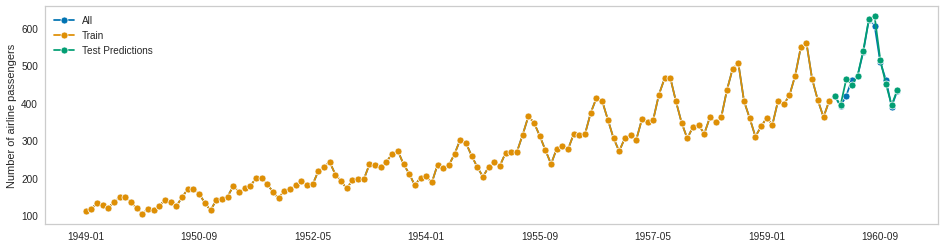

In [12]:
y_predict = exp.predict_model(tuned_model)
plot_series(data, y_train, y_predict, labels=['All', 'Train', 'Test Predictions'])
plt.grid()

/home/amir/pycaret-time-series-env/lib/python3.8/site-packages/sktime/forecasting/base/_fh.py:100: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  values = pd.Int64Index(values, dtype=int)
/home/amir/pycaret-time-series-env/lib/python3.8/site-packages/sktime/forecasting/base/adapters/_statsmodels.py:50: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  if isinstance(y, pd.Series) and type(y.index) == pd.Int64Index:
/home/amir/pycaret-time-series-env/lib/python3.8/site-packages/pycaret/utils/time_series/forecasting/model_selection.py:118: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lower = pd.Series([])
/home/amir/pycaret-time-series-env/lib/python3.8/site-packa

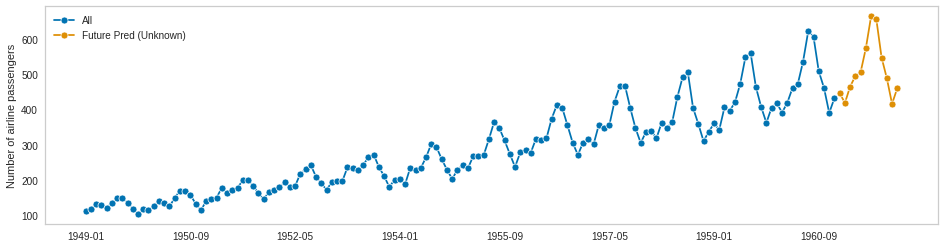

In [13]:
# Finalize Model
final_model = exp.finalize_model(tuned_model)
# Future Predictions
y_pred_future = exp.predict_model(final_model, verbose=False)
_=plot_series(data, y_pred_future, labels=['All', 'Future Pred (Unknown)'])
plt.grid()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,ETS,9.5284,15.4596,0.0203,0.0199,0.3129,0.4475,0.9569


/home/amir/pycaret-time-series-env/lib/python3.8/site-packages/pycaret/utils/time_series/forecasting/model_selection.py:118: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lower = pd.Series([])
/home/amir/pycaret-time-series-env/lib/python3.8/site-packages/pycaret/utils/time_series/forecasting/model_selection.py:119: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  upper = pd.Series([])
/home/amir/pycaret-time-series-env/lib/python3.8/site-packages/sktime/utils/datetime.py:40: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return pd.Int64Index([d.n / count for d in duration])
/home/amir/pycaret-time-series-env/lib/python3.8/site-packages/sktime/forecasti

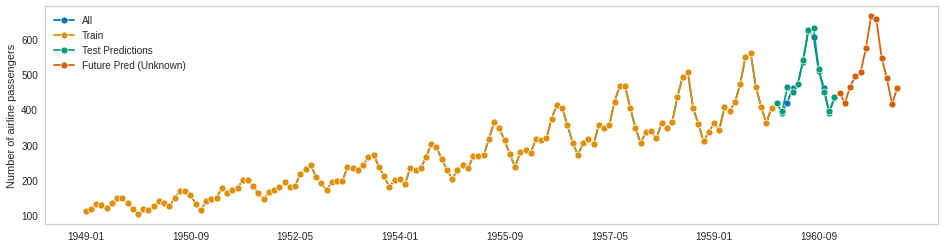

In [14]:
# Test Set Predictions
y_pred = exp.predict_model(tuned_model)

# Finalize Model
final_model = exp.finalize_model(tuned_model)

# Future Predictions
y_pred_future = exp.predict_model(final_model, verbose=False)

# Plot Results
y_train = exp.get_config("y_train")
_ = plot_series(data, y_train, y_pred, y_pred_future, labels=['All', 'Train', 'Test Predictions', 'Future Pred (Unknown)'])
plt.grid()
